In [1]:
import tensorflow as tf

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout, MaxPooling2D, AveragePooling2D, Dense, Flatten, Input, Conv2D, add, Activation
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from PIL import Image
import matplotlib.pyplot as plt

import cv2
from imutils import paths
import numpy as np
import os
import time
import warnings
warnings.filterwarnings("ignore")

In [19]:
train_dir = 'G:\soil classsification\Soil types\Train'
test_dir = 'G:\\soil classsification\\Soil types\\test'

image_size = 224

In [28]:
batch_size = 6

train_datagen = ImageDataGenerator(rescale = 1./255,
                            rotation_range=45,
                            zoom_range=0.40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            vertical_flip= True,
                            fill_mode="nearest")

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(150,150),
                                              batch_size=6,
                                              class_mode="categorical")

Found 116 images belonging to 5 classes.


In [29]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(150,150),
                                            batch_size=3,
                                            class_mode="categorical")

Found 40 images belonging to 5 classes.


In [30]:

#=================================================================
chanDim = 1
model = Sequential(name="SoilNet")
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(150,150,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(32, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation("softmax"))


model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
reduction_lr = ReduceLROnPlateau(monitor = "val_accuracy",patience = 2 ,verbose = 1, factor = 0.2, min_lr = 0.00001)
model.summary()
plot_model(model,show_shapes=True)


Model: "SoilNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 50, 50, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 50, 50, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 25, 25, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         5,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,984,005 (72.42 MB)

 Trainable params: 18,981,957 (72.41 MB)

 Non-trainable params: 2,048 (8.00 KB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [31]:
callback_list = [reduction_lr]

In [32]:
print(train_data.class_indices)
print(test_data.class_indices)


{'black soil': 0, 'cinder soil': 1, 'laterite': 2, 'peat soil': 3, 'yellow soil': 4}
{'black soil': 0, 'cinder soil': 1, 'laterite': 2, 'peat soil': 3, 'yellow soil': 4}


In [33]:
#bot_callback = botCallback(access_token)
#plotter = Plotter(access_token)
#callback_list = [bot_callback,plotter] callbacks=callback_list
start = time.time()

history = model.fit(train_data,
                    steps_per_epoch = 30,
                    validation_data = test_data,
                    validation_steps = 30,
                    epochs=15,
                    callbacks = callback_list)
end = time.time()
print("Total train time: ",(end-start)/60," mins")

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 274ms/step - accuracy: 0.4658 - loss: 2.9883 - val_accuracy: 0.3500 - val_loss: 3.3702 - learning_rate: 0.0010
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.4165 - loss: 2.3006 - val_accuracy: 0.2000 - val_loss: 2.9549 - learning_rate: 0.0010
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.6037 - loss: 1.2980 - val_accuracy: 0.4250 - val_loss: 1.8363 - learning_rate: 0.0010
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.5307 - loss: 1.3587 - val_accuracy: 0.3750 - val_loss: 2.2571 - learning_rate: 0.0010
Epoch 5/15
20/30 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.4475 - loss: 1.5574
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.4794 - loss: 1.5014 - val_accuracy: 0.2250 - val_loss: 4.9926 - learning_rate: 0.0010
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.5495 - loss: 1.6479 -

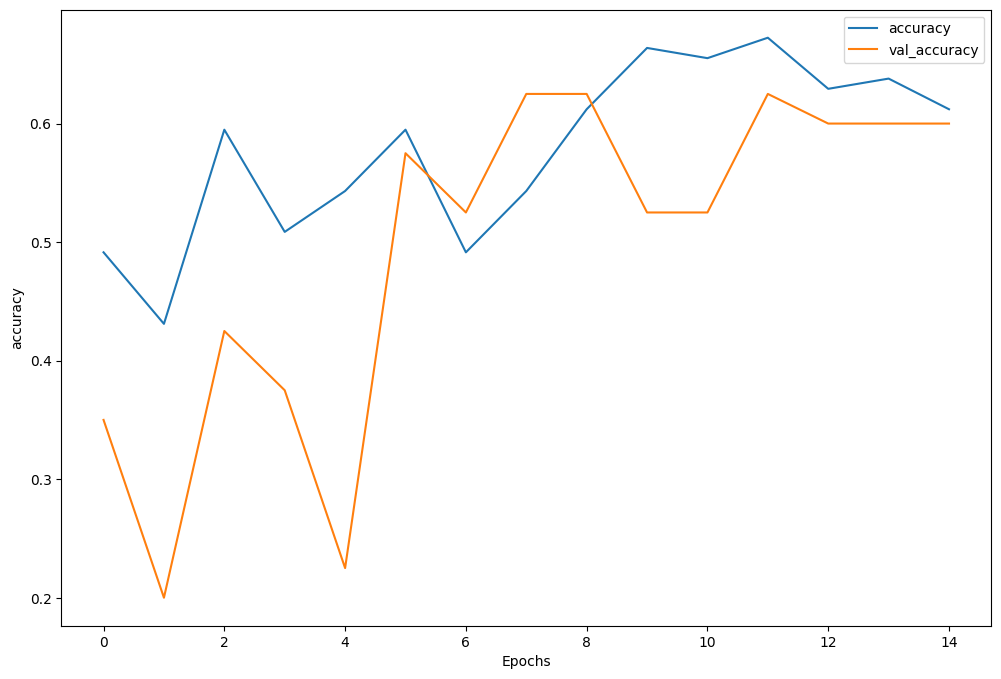

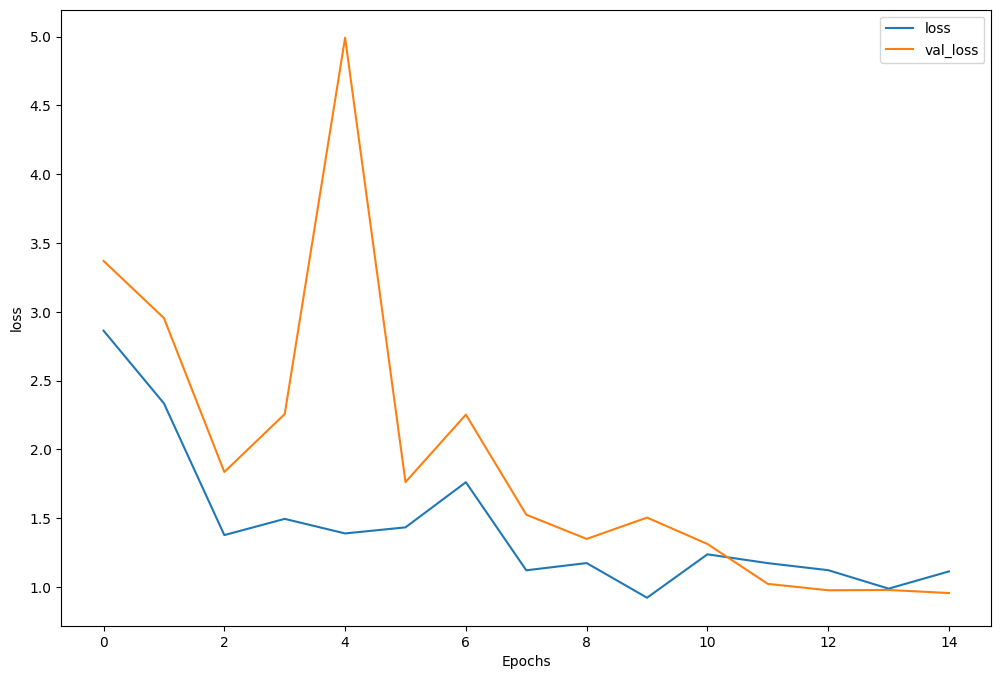

In [34]:
def plot_graph(history,string):
    plt.figure(figsize=(12,8))
    plt.plot(history.history[string],label=str(string))
    plt.plot(history.history["val_"+str(string)],label="val_"+str(string))
    plt.xlabel("Epochs")
    plt.ylabel(str(string))
    plt.legend()
    plt.show()
plot_graph(history,"accuracy")
plot_graph(history,"loss")

In [35]:
model.save("AbhikNet.h5")

In [36]:
from IPython.display import FileLink
FileLink('AbhikNet.h5')

g:\soil classsification\AbhikNet.h5

In [43]:
model.evaluate(train_data)  # Run on a small dataset to trigger metric computation


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.5931 - loss: 1.0193 


[1.05221426486969, 0.5775862336158752]

In [45]:
from tensorflow.keras.models import load_model
# Recompile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model = load_model("G:\soil classsification\AbhikNet.h5", compile=True) 


